### EAS4305/6305 Week1: TEOS-10

In [1]:
import gsw
import matplotlib.pyplot as plt

### The first step is to convert practical salinity to absolute salinity using gsw.SA_from_SP

The following vertical profiles, from the North Pacific, are of 
Practical Salinity, SP, and in-situ temperature, t, as a function 
of pressure, p, 

In [2]:
SP = [ 34.5759,  34.2870,  34.5888,  34.6589,  34.6798,  34.6910,  34.6956 ] 
t  = [ 19.5076,   3.6302,   1.9533,   1.5661,   1.4848,   1.4989,   1.5919 ] 
p  = [       0,     1010,     2025,     3045,     4069,     5098,     6131 ] 

The conversion from Practical Salinity, SP, 
into Absolute Salinity, SA is done with the function "gsw.SA_from_SP(SP,p,long,lat)" 

SA=[34.73972728 34.4674316  34.77620324 34.84585616 34.86601468 34.87685236
 34.87975849]


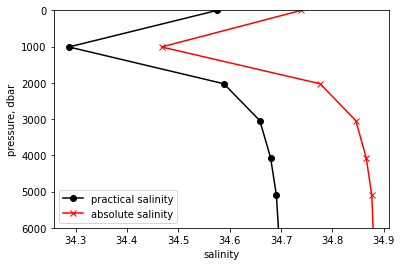

In [3]:
SA = gsw.SA_from_SP(SP,p,-160,40) 
print('SA='+str(SA))   # display the results
plt.plot(SP,p,'ko-')   # plot SP as a function of pressure (depth)
plt.plot(SA,p,'rx-')   # plot SA as a function of pressure (depth) for visual comparison
plt.ylim([6000,0])
plt.legend(['practical salinity','absolute salinity'])
plt.xlabel('salinity')
plt.ylabel('pressure, dbar')
plt.show()

### The second step is to convert in-situ temperature, t, into Conservative Temperature, CT, using the function "gsw.CT_from_t"

CT=[19.51299491  3.55875113  1.81568263  1.34340739  1.15827729  1.05170529
  1.00724574]


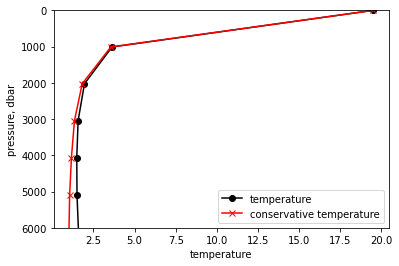

In [4]:
CT = gsw.CT_from_t(SA,t,p) 
print('CT='+str(CT))   # display the results
plt.plot(t,p,'ko-')    # plot temperature as a function of pressure (depth)
plt.plot(CT,p,'rx-')   # plot conservative temperature as a function of pressure (depth) for visual comparison
plt.ylim([6000,0])
plt.legend(['temperature','conservative temperature'])
plt.xlabel('temperature')
plt.ylabel('pressure, dbar')
plt.show()

At this point the data has been converted into SA and CT, which are the TEOS-10 salinity and temperature variables.  

With these variables it is possible to compute the complete range of water column properties. 

### The first property to be demonstrated is density (rho) as a function of SA and CT.  This is computed by using the function "gsw.rho". 

rho=[1024.57126169 1031.9394189  1037.0049566  1041.67137389 1046.18173688
 1050.59376999 1054.9030049 ]


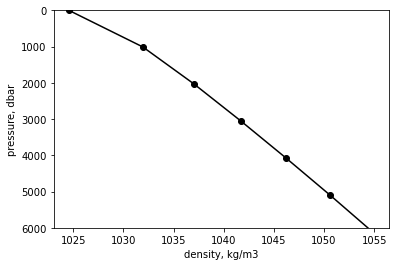

In [5]:
rho = gsw.rho(SA,CT,p) # calculate density of seawater
print('rho='+str(rho)) # display the results
plt.plot(rho,p,'ko-')    # plot density as a function of pressure (depth)
plt.ylim([6000,0])
plt.xlabel('density, kg/m3')
plt.ylabel('pressure, dbar')
plt.show()

### Calculating the Conservative Temperature at which seawater freezes is done with the function "gsw.CT_freezing_poly" 

This programme allows the user to choose the amount of air which the water contains. 

When saturation_fraction is 0 the seawater contains no air, and when saturation_fraction is 1 the seawater is completely saturated with air. 

The example below is to have the seawater air free. 

CT_freezing=[-1.89172277 -2.66791998 -3.52023149 -4.40017205 -5.31749926 -6.2750024
 -7.2713398 ]


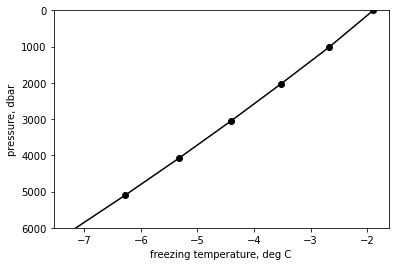

In [6]:
CT_freezing = gsw.CT_freezing_poly(SA,p,0) # calculate the freezing point
print('CT_freezing='+str(CT_freezing))             # display the results
plt.plot(CT_freezing,p,'ko-')                      # plot density as a function of pressure (depth)
plt.ylim([6000,0])
plt.xlabel('freezing temperature, deg C')
plt.ylabel('pressure, dbar')
plt.show()